# Name : Niranjan
Status : Intern
Organisation : The Sparks Foundation
Task - 1 : Prediction using Supervised ML

### Predict the percentage of marks of an student based on the number of study hours.

## STEP 1 : Importing the Libaries & dataset

### Importing all libraries required for this task

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("http://bit.ly//w-data")

In [3]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


# STEP 2 : Checking for Missing Values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# STEP 3:Visualising the data

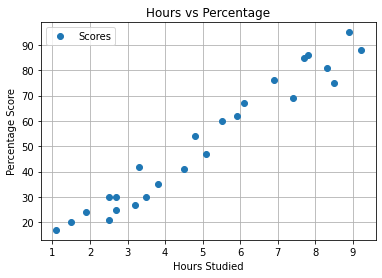

In [9]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

#### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

In [10]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# ## STEP 4 : Data preparation & Splitting the dataset

### Using iloc function we will divide the data 

In [11]:
x=data.iloc[:,0].values.reshape(-1,1)
y=data.iloc[:,-1]

In [12]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [13]:
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [14]:
x.shape

(25, 1)

In [15]:
y.shape

(25,)

### Splitting data into training and testing data(Ratio - 80:20)# 

In [16]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.20, random_state=0)

# STEP 5: Training the Model

In [17]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
model=LR.fit(x_train,y_train)

# ### Printing the coefficient and intercept of the model after training

In [18]:
LR.coef_

array([9.91065648])

In [19]:
LR.intercept_

2.018160041434683

In [20]:
# predicting on training data-set
y_train_predicted = LR.predict(x_train)
print(y_train_predicted)

[39.67865467 20.84840735 79.32128059 70.40168976 12.91988217 52.56250809
 78.33021494 34.72332643 84.27660883 93.19619966 62.47316457 36.70545772
 28.77693254 56.52677068 28.77693254 86.25874013 26.79480124 49.58931115
 90.22300272 46.6161142 ]


In [21]:
from sklearn.metrics import r2_score,mean_squared_error

In [22]:
#  evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
r2_train = r2_score(y_train, y_train_predicted)
print(rmse_train)
print(r2_train)

5.558613350226342
0.9515510725211552


# STEP 6 : Visualizing the model

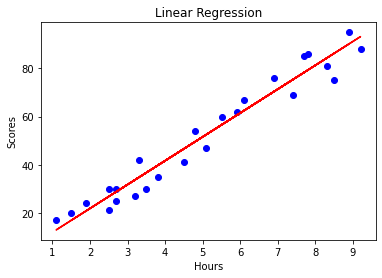

In [23]:
plt.scatter(x, y, color = 'blue')
plt.plot(x, LR.predict(x), color = 'red')
plt.title('Linear Regression')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

# STEP 7 : Making Predictions# 

In [24]:
# predicting on test data-set
y_pred=LR.predict(x_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [25]:
# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = r2_score(y_test, y_pred)
print(rmse_test)
print(r2_test)

4.6474476121003665
0.9454906892105356


### Comparing actual and predicated values of a dataframes# 

In [26]:
#Actual VS Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


### Predicting a new value - No. of hours studied = 9.25# 

In [27]:
hours = 9.25
own_pred = LR.predict([[hours]])
print("Number of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Number of Hours = 9.25
Predicted Score = 93.69173248737538


#  Step 8 : Model Evaluation

In [28]:
from sklearn import metrics
from math import sqrt
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


# Inference : For 9.25 hours of study percentage expected is 93.7 % approx.
#Task 1 Completed. Thanks for reading!!